Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read the data
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


from the description i can inferred that the discount column is in percentage

Categorical analysis

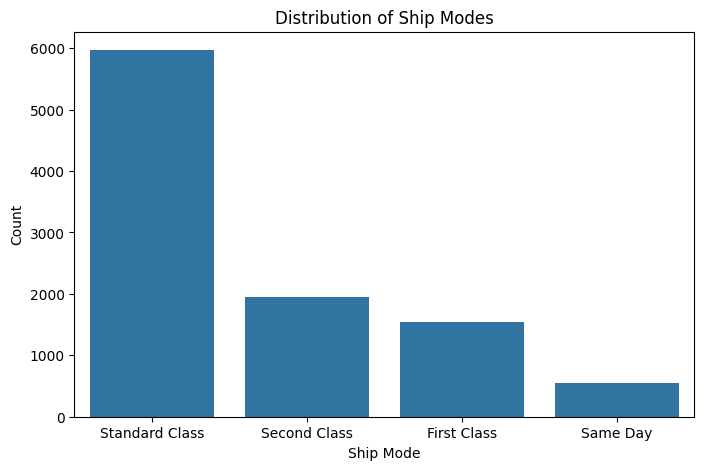

In [5]:
# Bar Plot for Ship Mode
plt.figure(figsize=(8, 5))
sns.countplot(x='Ship Mode', data=data, order=data['Ship Mode'].value_counts().index)
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

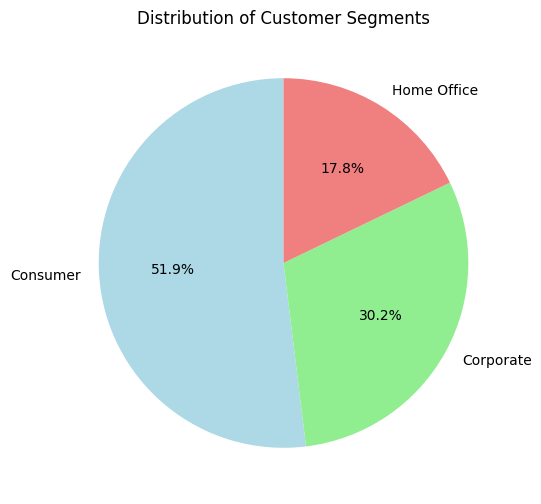

In [6]:
# Pie Chart for Segment Distribution
segment_counts = data['Segment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Customer Segments')
plt.show()

In [7]:
#check for missing values
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#check for suplicated values
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [9]:
#create a column Total Revenue
data["Total Revenue"] = (data["Sales"] * data["Quantity"]) - (data['Discount'] * data["Sales"])

In [10]:
#total revenue
total_revenue = data['Total Revenue'].sum()
print(f"Total Revenue made by the company is ${total_revenue}")

Total Revenue made by the company is $11162719.855159


What is the top selling and least selling product?

In [11]:
#top selling product by Sales Revenue
# Find the maximum sales 
max_sales = data["Total Revenue"].max()

# Get the rows where Quantity is equal to the max value
max_sales_made = data[data["Total Revenue"] == max_sales][["Category", "Sub-Category", "Total Revenue"]]

# Print results in a readable format
#individual product with highest revenue
for _, row in max_sales_made.iterrows():
    print(f"Category: {row['Category']}, Sub-Category: {row['Sub-Category']}, Total Revenue: {row['Total Revenue']}")

Category: Office Supplies, Sub-Category: Binders, Total Revenue: 128605.62


In [12]:
min_sales = data["Total Revenue"].min()
# Get the rows where Quantity is equal to the max value
min_sales_made = data[data["Total Revenue"] == min_sales][["Category", "Sub-Category", "Total Revenue"]]

# Print results in a readable format
#individual product with least revenue
for _, row in min_sales_made.iterrows():
    print(f"Category: {row['Category']}, Sub-Category: {row['Sub-Category']}, Total Revenue: {row['Total Revenue']}")

Category: Office Supplies, Sub-Category: Appliances, Total Revenue: 0.08879999999999999


In [13]:
# Group by Category and Sub-Category and sum the quantity
grouped_sales = data.groupby(["Category", "Sub-Category"])["Quantity"].sum().reset_index()

# Get the product with the highest quantity sold
top_selling = grouped_sales.sort_values(by="Quantity", ascending=False).head(10)
print(top_selling)


           Category Sub-Category  Quantity
6   Office Supplies      Binders      5971
10  Office Supplies        Paper      5144
2         Furniture  Furnishings      3560
16       Technology       Phones      3289
11  Office Supplies      Storage      3158
5   Office Supplies          Art      2996
13       Technology  Accessories      2976
1         Furniture       Chairs      2351
4   Office Supplies   Appliances      1729
9   Office Supplies       Labels      1396


C:\Users\HP\AppData\Local\Temp\ipykernel_2648\95567643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_selling, y="Quantity", x="Sub-Category", palette='viridis')


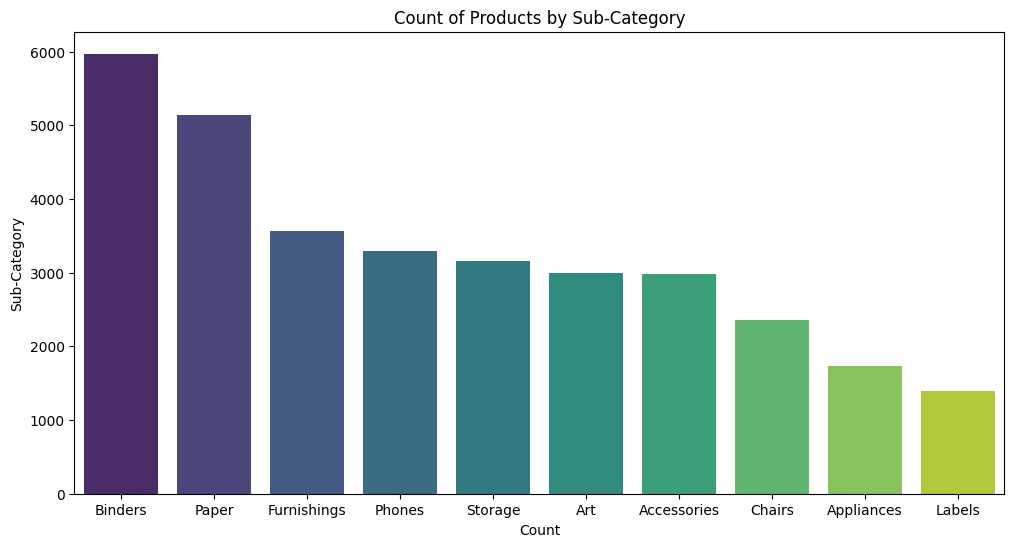

In [14]:
# Horizontal Bar Plot for Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(data=top_selling, y="Quantity", x="Sub-Category", palette='viridis')
plt.title('Count of Products by Sub-Category')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.show()

This plot shows which sub-categories (e.g., Binders, Paper, Furnishings) have the highest and lowest product counts. For example, if "Binders" has the highest count, it might indicate high demand or frequent restocking.

C:\Users\HP\AppData\Local\Temp\ipykernel_2648\493002978.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5[metric].values, y=top_5[metric].index, ax=ax, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_2648\493002978.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5[metric].values, y=top_5[metric].index, ax=ax, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_2648\493002978.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5[metric].values, y=top_5[metric].index, ax=ax, palette='viridis')
C

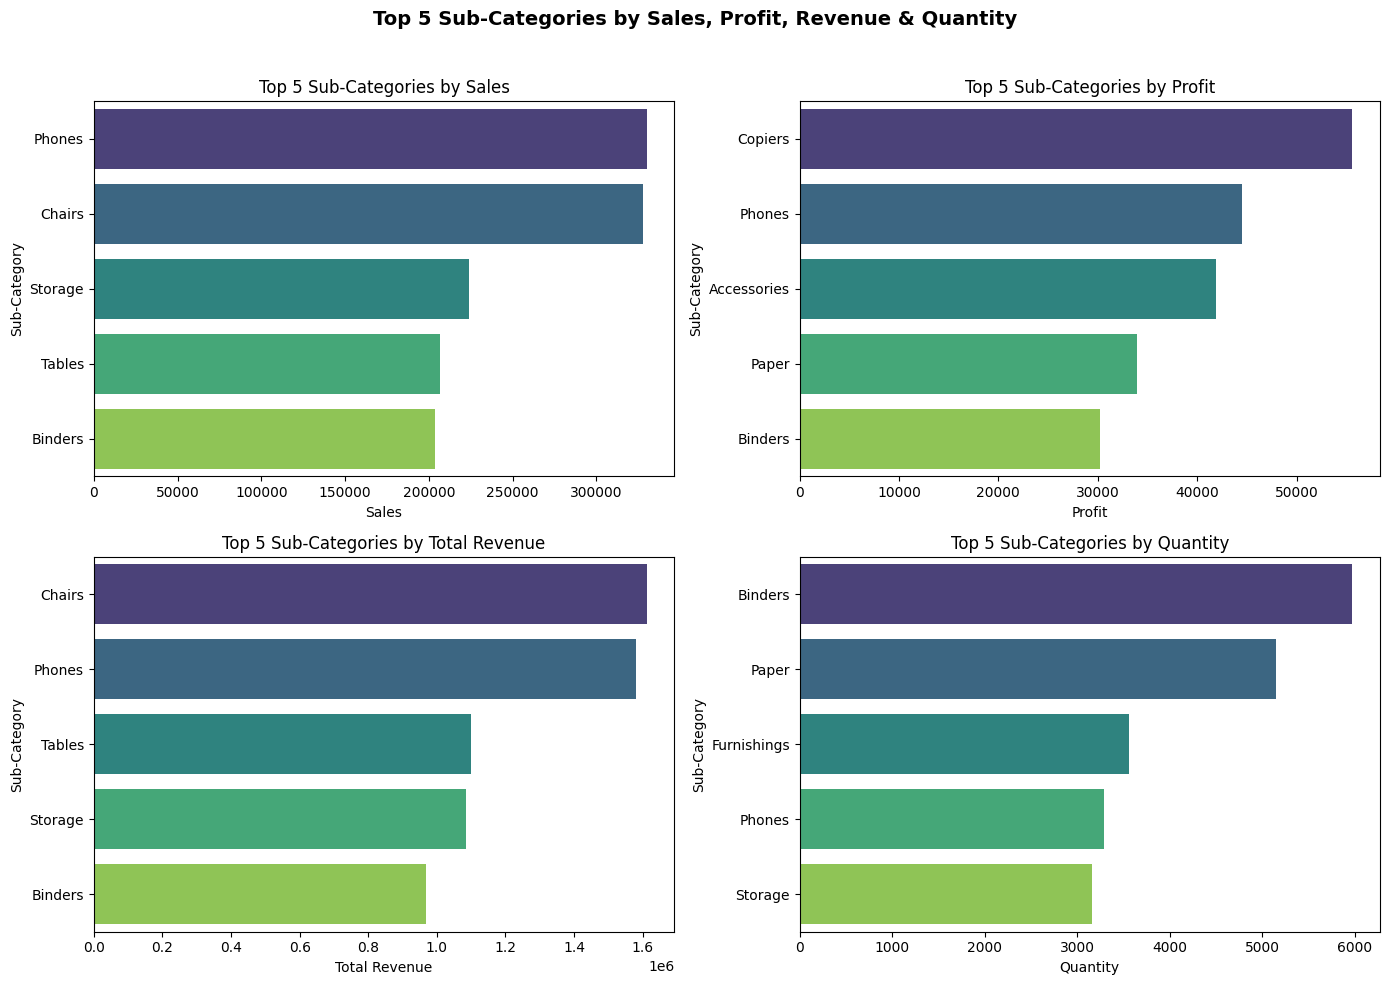

In [15]:
#summarizing products by sales
summary = data.groupby('Sub-Category')[['Sales', 'Profit', 'Total Revenue', 'Quantity']].sum()

# Get top 5 sub-categories for each metric
top_5 = {col: summary[col].nlargest(5) for col in summary.columns}

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Top 5 Sub-Categories by Sales, Profit, Revenue & Quantity', fontsize=14, fontweight='bold')

# Define metrics and titles for the subplots
metrics = ['Sales', 'Profit', 'Total Revenue', 'Quantity']
titles = ['Top 5 Sub-Categories by Sales', 'Top 5 Sub-Categories by Profit',
          'Top 5 Sub-Categories by Total Revenue', 'Top 5 Sub-Categories by Quantity']

# Loop through each metric and plot
for ax, metric, title in zip(axes.flat, metrics, titles):
    sns.barplot(x=top_5[metric].values, y=top_5[metric].index, ax=ax, palette='viridis')
    ax.set_title(title)
    ax.set_xlabel(metric)
    ax.set_ylabel('Sub-Category')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Profitability analysis

In [16]:
total_profit = data.Profit.sum()
print(f"The company made a total of ${total_profit} in profit")

The company made a total of $286241.4226 in profit


In [17]:
#to check for this there has to be a threshold
data["Profit Margin"] = (data["Profit"] / data['Sales']) * 100

#threshold fro high sales is set to 75th percentile
high_sales_threshold = data["Sales"].quantile(0.75)
low_profit_threshold = 5 #less than 5% of the profit margin

#filter for high sales and low profit 
high_sales_low_profit = data[(data["Sales"] >= high_sales_threshold) & (data["Profit Margin"] <= low_profit_threshold)]
high_sales_low_profit[["Category", "Sub-Category", "Sales", "Profit", "Profit Margin", "Discount"]].head()

,Category,Sub-Category,Sales,Profit,Profit Margin,Discount
3,Furniture,Tables,957.5775,-383.0310,-40.000000,0.45
10,Furniture,Tables,1706.1840,85.3092,5.000000,0.20
16,Office Supplies,Storage,665.8800,13.3176,2.000000,0.00
27,Furniture,Bookcases,3083.4300,-1665.0522,-54.000000,0.50
38,Furniture,Bookcases,532.3992,-46.9764,-8.823529,0.32


In [18]:
grouped_by_sub_category = data.groupby(["Sub-Category"])[["Category", "Sub-Category", "Sales", "Profit", "Profit Margin", "Discount"]].sum()
max_total_profit_index = grouped_by_sub_category["Profit"].idxmax()
max_total_profit_value = grouped_by_sub_category["Profit"].max()
min_total_profit_index = grouped_by_sub_category["Profit"].idxmin()
min_total_profit_value = grouped_by_sub_category["Profit"].min()
print(f"The product with the most profit is {max_total_profit_index} with total profit of ${max_total_profit_value:.2f}")
print(f"The product with the most profit is {min_total_profit_index} with total profit of ${min_total_profit_value:.2f}")

The product with the most profit is Copiers with total profit of $55617.82
The product with the most profit is Tables with total profit of $-17725.48


Are there products with high sales and low profitability

The profit margin of the products above are close to zero or even negative, this suggests over discounting on the products. This can be tackled by reducing the discounts offered on these products

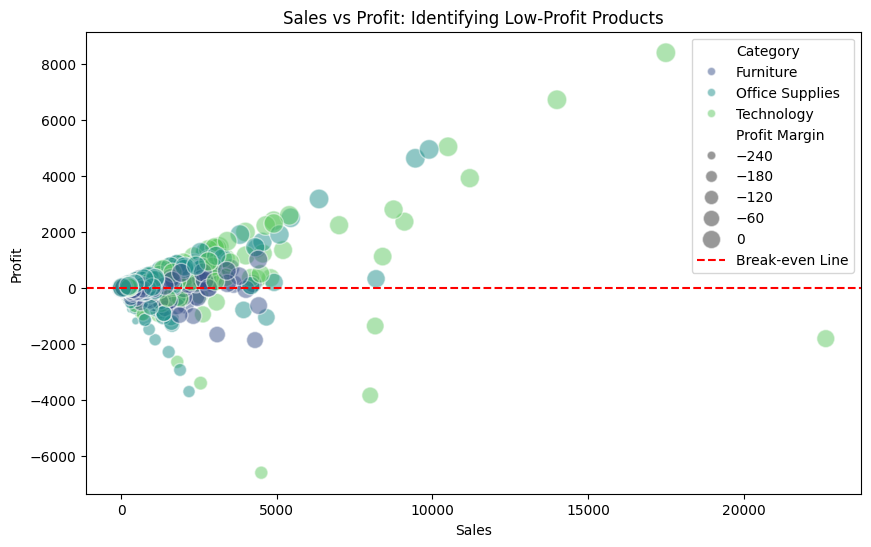

In [19]:
#visualize profit vs sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="Sales", y="Profit", hue="Category", size="Profit Margin", palette="viridis", sizes=(20,200), alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Break-even Line")
plt.title("Sales vs Profit: Identifying Low-Profit Products")
plt.legend()
plt.show()

Discount Analysis

In [20]:
#do higher discount lead to more sales or more profit?
grouped_by_category = data.groupby(['Category'])[['Sales', 'Profit', 'Total Revenue', "Quantity", "Discount"]].mean()
grouped_by_category

,Sales,Profit,Total Revenue,Quantity,Discount
Category,,,,,
Furniture,350.002981,8.697740,1762.976405,3.786591,0.174027
Office Supplies,119.550107,20.353403,577.367757,3.802562,0.157385
Technology,452.709276,78.752002,2142.718393,3.756903,0.132323


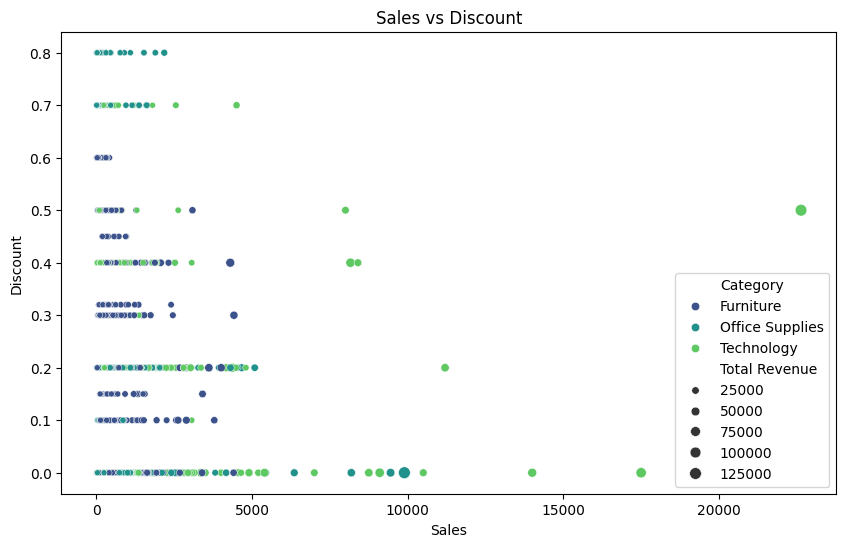

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="Sales", y="Discount", hue="Category", size="Total Revenue", palette="viridis")
plt.title("Sales vs Discount")
plt.legend()
plt.show()

this graph suggests no correlation between sales and discounts offered. it implies that if the discounts are cut off, the sales will not be affected

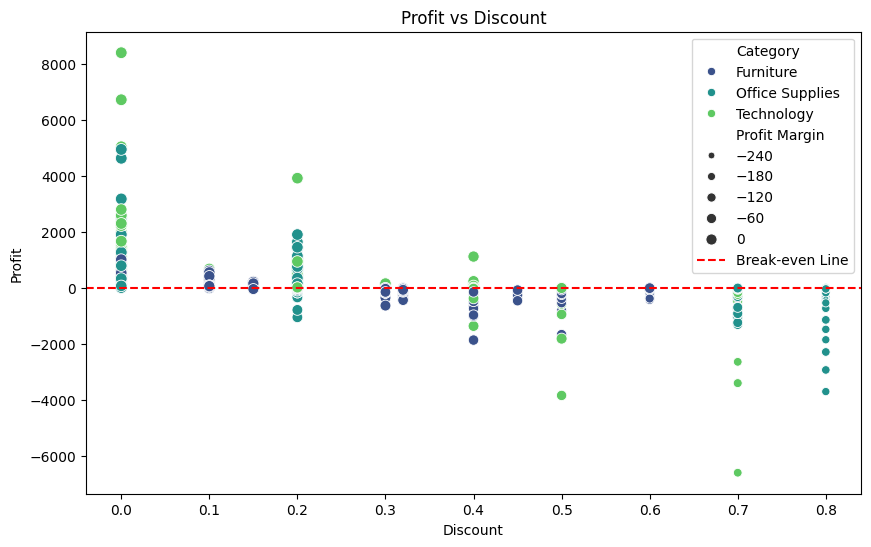

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="Discount", y="Profit", hue="Category", size="Profit Margin", palette="viridis")
plt.title("Sales vs Profit: Identifying Low-Profit Products")
plt.axhline(y=0, color='red', linestyle='--', label="Break-even Line")
plt.title("Profit vs Discount")
plt.legend()
plt.show()

This graph suggest that higher discount is often associated with loweerr or negative profit, indicating excessive discounting which may hurt the business' profitability.

Customer behavior and demographics

In [23]:
#sales by region
grouped_by_region = data.groupby(['Region'])[['Sales', 'Profit', 'Total Revenue', "Quantity"]].sum()
grouped_by_region

,Sales,Profit,Total Revenue,Quantity
Region,,,,
Central,500782.8528,39655.8752,2.396690e+06,8768
East,678435.1960,91506.3092,3.283999e+06,10609
South,391721.9050,46749.4303,1.980896e+06,6209
West,725255.6365,108329.8079,3.501135e+06,12234


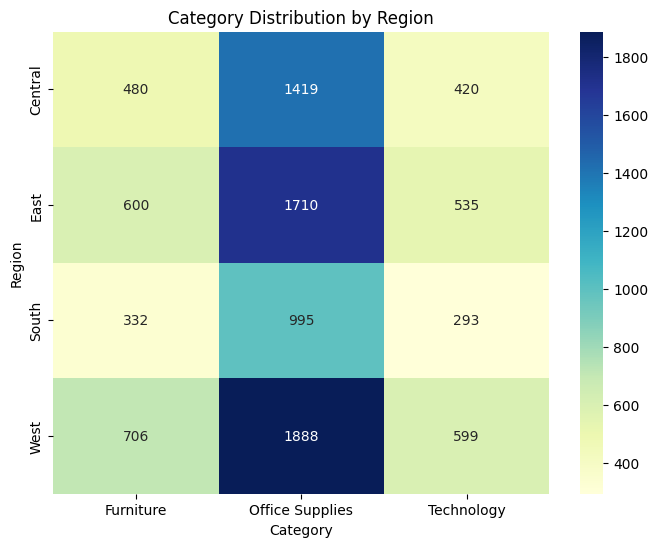

In [24]:
# Heatmap for Category vs. Region
category_region = data.groupby(['Region', 'Category']).size().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(category_region, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Category Distribution by Region')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

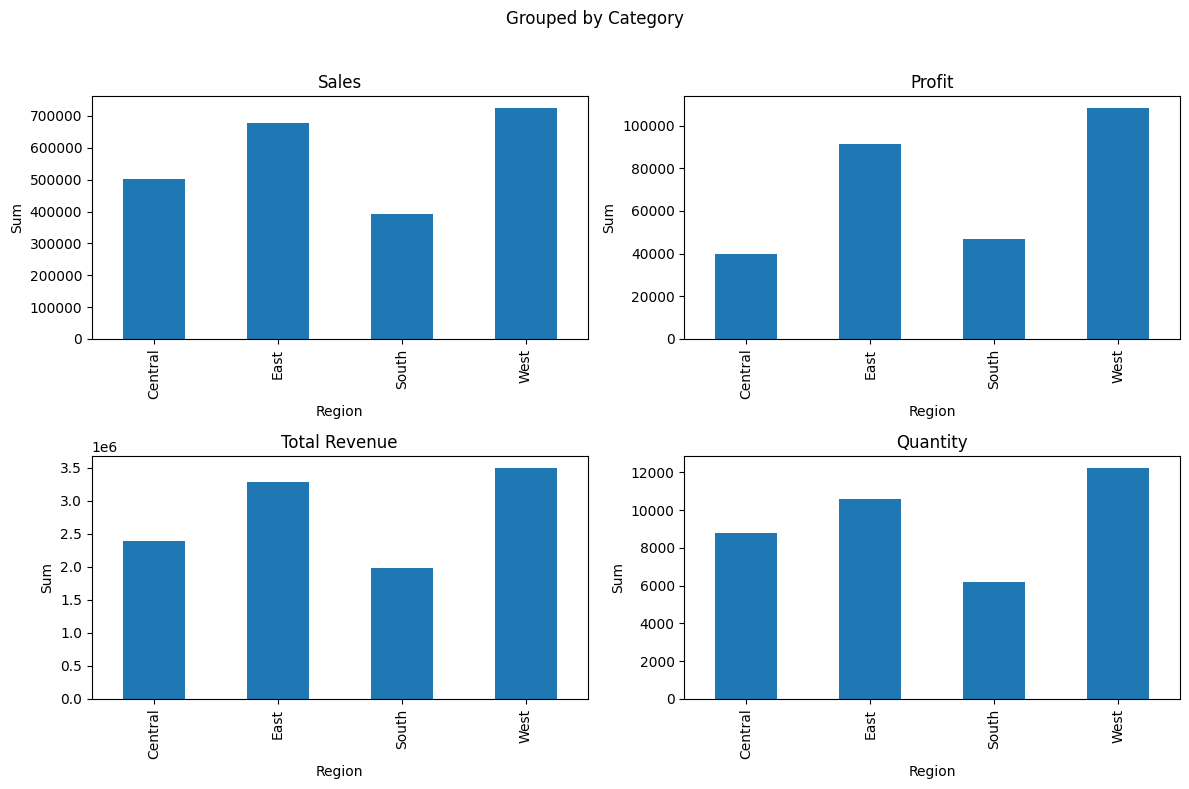

In [25]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Grouped by Category')

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(grouped_by_region.columns):
    grouped_by_region[column].plot(kind='bar', ax=axes[i], title=column)
    axes[i].set_ylabel('Sum')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

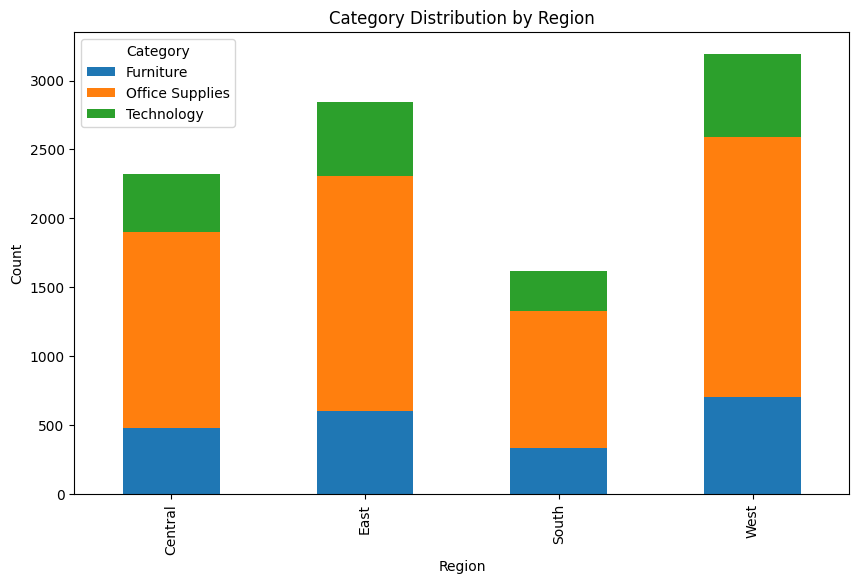

In [26]:
# Stacked Bar Plot for Category vs. Region
category_region = data.groupby(['Region', 'Category']).size().unstack()
category_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Category Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

<Axes: title={'center': 'States with most customers'}, xlabel='State'>

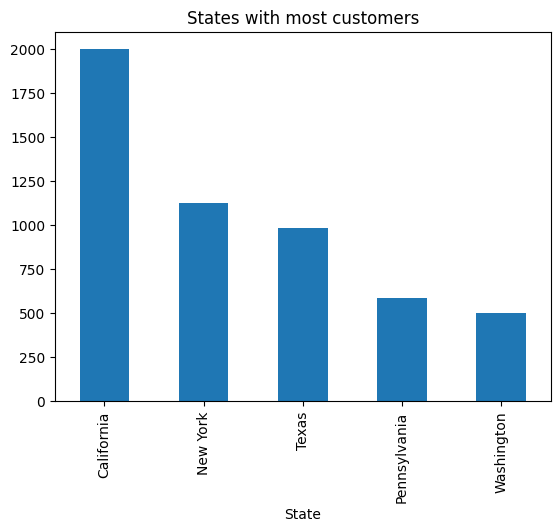

In [27]:
customer_by_state = data.groupby(["State"])["Segment"].count()
top_5_states_with_most_cutomer = customer_by_state.nlargest(5)
top_5_states_with_most_cutomer.plot(kind='bar', title="States with most customers")

<Axes: title={'center': 'States with Highest Revenue'}, xlabel='State'>

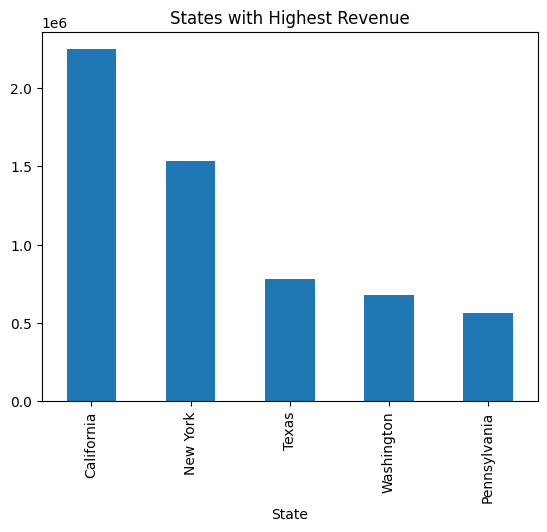

In [28]:
#state with most sales
sales_by_state = data.groupby(['State'])["Total Revenue"].sum()
top_5_states_with_highest_revenue = sales_by_state.nlargest(5)
top_5_states_with_highest_revenue.plot(kind='bar', title="States with Highest Revenue")

The total number of customers per state contributes strongly to the revenue generated by that state

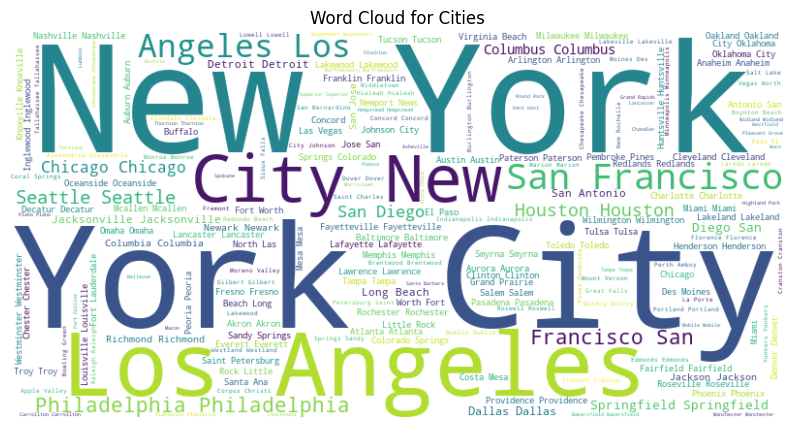

In [29]:
from wordcloud import WordCloud

# Word Cloud for City
city_text = ' '.join(data['City'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(city_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cities')
plt.show()

In [30]:
grouped = data.groupby(["Sub-Category"])["Profit"].sum()
grouped.nlargest(5)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          33944.2395
Binders        30228.0003
Name: Profit, dtype: float64